In [1]:
!pip install factor_analyzer

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [45]:
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [47]:
X=df.drop('species',axis=1)

In [49]:
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print(f"Chi-Square value: {chi_square_value:.3f}, p-value: {p_value:.3f}")

Chi-Square value: 706.959, p-value: 0.000


In [50]:
kmo_all, kmo_model = calculate_kmo(X)
print(f"KMO Model: {kmo_model:.3f}")

KMO Model: 0.540


In [38]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(X)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

ValueError: x and y must be the same size

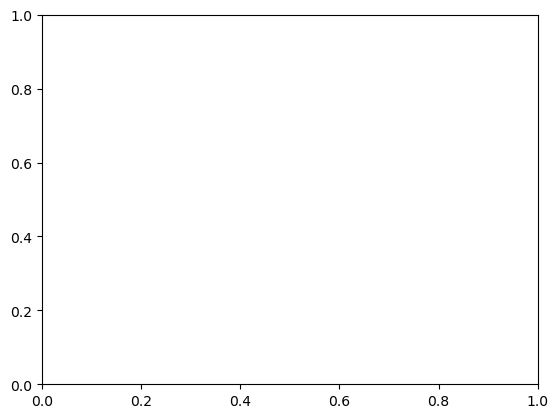

In [51]:
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, X.shape[1]+1), eigen_values)
plt.plot(range(1, X.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [19]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [41]:
loadings = pd.DataFrame(fa.loadings_, index=X.columns, columns=['Factor1', 'Factor2'])
print(loadings)

       Factor1   Factor2   Factor3
mpg   0.664678 -0.446785 -0.488240
cyl  -0.627468  0.695738  0.282671
disp -0.717999  0.536825  0.301686
hp   -0.305103  0.681623  0.557019
drat  0.806782 -0.237814 -0.063683
wt   -0.784051  0.246917  0.481970
qsec -0.176934 -0.933752 -0.212663
vs    0.289355 -0.797606 -0.231490
am    0.892181  0.106374 -0.082767
gear  0.897917  0.005800  0.245281
carb  0.092934  0.507064  0.774278


In [43]:
variance = fa.get_factor_variance()
variance_df = pd.DataFrame({
    'Factor': ['Factor1', 'Factor2'],
    'Variance': variance[0],            
    'Proportional Var': variance[1], 
    'Cumulative Variance': variance[2] 
})
print(variance_df)

(array([4.43566746, 3.33051272, 1.72124881]), array([0.4032425 , 0.30277388, 0.15647716]), array([0.4032425 , 0.70601638, 0.86249354]))


In [44]:
factor_scores = fa.transform(X) 
factor_scores_df = pd.DataFrame(factor_scores, columns=['Factor1', 'Factor2'])
print(factor_scores_df.head())

    Factor1   Factor2   Factor3
0  0.889551  0.714905 -0.202932
1  0.759223  0.452291  0.037758
2  0.689007 -0.552857 -0.627795
3 -0.867423 -0.630658 -0.852553
4 -0.863142  0.907046 -1.007371
